<a href="https://colab.research.google.com/github/AKraubayev/four_unlimited/blob/TEST/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22ml_engineering_weapon_and_no_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание хакатона осеннего семестра первого курса магистратуры "Инженерия машинного обучения":


# No/Weapons: набор изображений, содержащих и не содержащих оружие #

## Версия: 2021.11.22.0 ##

Наборы изображений с оружием и не с оружием. В наборы содержащих оружие (папки "weapon") в датасетах train и test,включены изображение следующих предмметов: Пистолет, Пистолет-пулемёт, Автомат, Автоматическая винтовка, РПГ, ПЗРК,Винтовка, Ружьё, Пулемёт, Гранатомёт, Кинжал, Тесак, Мачете, Граната, Метательный нож.В наборы НЕ содержащих оружие (папки "noweapon") в соответствующих датасетах,включены в том числе,следующие иображения: Сигарета, Ручка,Ручка в руке,Стилус,Шприц,Ножницы,Стилус в руке, Фотоапарат, Дерево-бонсай, Мозг, Люстра, Бабочка и др.

## Свойства набора данных ## 

Общее количество изображений: 2675.

Размер обучающего набора: 2280 изображения (допустимо несколько изображений предмета), из них 964 изображения пренадлежат к классу "не оружие" и расположены в папке test\noweapon и 1316 , к классу "оружие" и расположены в папке test\weapon

Размер тестового набора: 365 изображений (допустимо несколько изображений предмета), из них 95 изображения пренадлежат к классу "не оружие", расположены в папке test\noweapon и 300, к классу "оружие",расположены в папке test\weapon

Количество классов: 2 (оружие и не оружие, в коде: "weapon" и "noweapon" , соответственно).

## Структура репозитория ##

Архивы [Обучение] (train.zip) и [Тест] (test.zip) содержат все изображения, используемые для обучения и тестирования.В каждом из архивов изображения,преимущественно содержащие классифицируемый объект крупным планом,с очищенным или расфокусированным фоном,рассортированы по папкам "weapon" и "noweapon" в соответствии с классом.

## Источники набора ##

* [weapons-detection-Mask_RCNN] (https://github.com/mosamircs/weapons-detection-Mask_RCNN), 
* [Weapon detection datasets] (https://github.com/ari-dasci/OD-WeaponDetection),
* [roboflow] (https://public.roboflow.com)
* Открытие источники изображений, например https://yandex.ru/images 

## Подключаем библиотеки:

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

In [ ]:
!wget https://www.dropbox.com/s/dsltirre6hu724g/train.zip

--2021-11-27 04:41:11--  https://www.dropbox.com/s/dsltirre6hu724g/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dsltirre6hu724g/train.zip [following]
--2021-11-27 04:41:11--  https://www.dropbox.com/s/raw/dsltirre6hu724g/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc342bef089827406e68fc9e1687.dl.dropboxusercontent.com/cd/0/inline/BasDV7QmsRHC4VwC-3PSXxm_bloN5f5qO1Brqf8xM6sim03WkDtW7zmvhMprNpUpFP8XDtyG_WwkupVy7Rdor_cVIjo6LU_w-mrThBIpb2mLpDORbzd_AOHX9NVPoU0rcvY7GA3FPwvcYcJAyQ9y3bXH/file# [following]
--2021-11-27 04:41:11--  https://uc342bef089827406e68fc9e1687.dl.dropboxusercontent.com/cd/0/inline/BasDV7QmsRHC4VwC-3PSXxm_bloN5f5qO1Brqf8xM6sim03WkDtW7zmvhMprNpUpFP8XDtyG_WwkupVy7Rdor_cVIjo

In [ ]:
!wget https://www.dropbox.com/s/tuyavsee0i6oqhy/test.zip?dl=0 -O test.zip

--2021-11-27 04:41:25--  https://www.dropbox.com/s/tuyavsee0i6oqhy/test.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tuyavsee0i6oqhy/test.zip [following]
--2021-11-27 04:41:25--  https://www.dropbox.com/s/raw/tuyavsee0i6oqhy/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucebf4150d13e5cdcfdc929ba700.dl.dropboxusercontent.com/cd/0/inline/BasyEArxTb1-4z_RISWEO2dNfbRuOJ21LdZOA5qsi0zS1iR4fYaQRKG4zlFgM8irRHekq6EdFC6mvyuwir0vhx9geewB9RF4AB-27VPDaef7hq9LIKvByEfHd0Tn7rXvshxRoO43uxsSA_9HPssfHb5t/file# [following]
--2021-11-27 04:41:26--  https://ucebf4150d13e5cdcfdc929ba700.dl.dropboxusercontent.com/cd/0/inline/BasyEArxTb1-4z_RISWEO2dNfbRuOJ21LdZOA5qsi0zS1iR4fYaQRKG4zlFgM8irRHekq6EdFC6mvyuwir0vhx9geewB9RF4

In [ ]:
!ls

sample_data  test.zip  train.zip


## Распаковываем архивы:

In [ ]:
!unzip -q train.zip

In [ ]:
!ls train


noweapon  weapon


In [ ]:
!unzip -q test.zip

In [ ]:
!ls test

noweapon  weapon


## Смотрим примеры картинок:

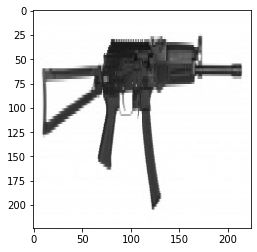

In [ ]:
img_path = '/content/train/weapon/File 1016.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

## Создаем наборы данных

Набор данных для обучения

In [ ]:
train_dataset = image_dataset_from_directory('train',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 2280 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
class_names

['noweapon', 'weapon']

Набор данных для тестирования

In [ ]:
test_dataset = image_dataset_from_directory('test',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 395 files belonging to 2 classes.


## Создаем составную нейронную сеть

In [ ]:
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
# Для задачи с двумя классами изображений
outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)
# Для задачи с несколькими классами изображений
# num_classes = 3 # Задаем количество классов
# outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
model = tf.keras.Model(inputs, outputs, name="EfficientNet")

16719872/16705208 [==============================] - 0s 0us/step


Компилируем составную нейронную сеть

In [ ]:
# Для задачи с двумя классами изображений
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
# Для задачи с несколькими классами изображений
# model.compile(loss='categorical_crossentropy',
#              optimizer='adam', 
#              metrics=['accuracy'])

## Обучаем сеть

In [ ]:
history = model.fit(train_dataset,
                    epochs=10)

Epoch 1/10
18/18 [==============================] - 32s 667ms/step - loss: 0.4959 - accuracy: 0.7662
Epoch 2/10
18/18 [==============================] - 13s 588ms/step - loss: 0.2357 - accuracy: 0.9009
Epoch 3/10
18/18 [==============================] - 13s 593ms/step - loss: 0.1686 - accuracy: 0.9351
Epoch 4/10
18/18 [==============================] - 13s 586ms/step - loss: 0.1558 - accuracy: 0.9364
Epoch 5/10
18/18 [==============================] - 13s 586ms/step - loss: 0.1441 - accuracy: 0.9425
Epoch 6/10
18/18 [==============================] - 13s 589ms/step - loss: 0.1148 - accuracy: 0.9531
Epoch 7/10
18/18 [==============================] - 13s 589ms/step - loss: 0.1068 - accuracy: 0.9627
Epoch 8/10
18/18 [==============================] - 13s 585ms/step - loss: 0.1025 - accuracy: 0.9592
Epoch 9/10
18/18 [==============================] - 13s 583ms/step - loss: 0.1028 - accuracy: 0.9588
Epoch 10/10
18/18 [==============================] - 13s 584ms/step - loss: 0.1036 - accura

Проверяем качество обучения на тестовом наборе данных


In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

4/4 [==============================] - 5s 495ms/step - loss: 0.0888 - accuracy: 0.9823


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 98.2278


## Использование нейронной сети для распознавания изображений

Вспоминаем номера классов

In [ ]:
class_names

['noweapon', 'weapon']

Загружаем изображение из файла

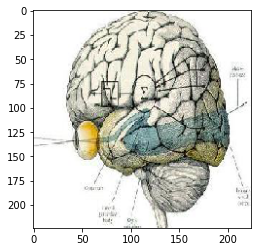

In [ ]:
img_path = '/content/train/noweapon/File 1211.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

Преобразуем изображение в массив

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Печатаем результаты распознавания

In [ ]:
def print_percent(t):
    return {
               t >= 0.5: str(round(t, 4) * 100),
               t < 0.5: str(round(1 - t, 4) * 100),
           }[1] + "%"

x = prediction[0][0]

sub = {
   x > 0.5 : "Это оружие",
   x == 0.5: "Не определено",
   x  < 0.5 : "Это НЕ оружие"
}[1]
print(sub + ", с вероятностью: " + print_percent(x))

Это НЕ оружие, с вероятностью: 97.77%
